Lambda School Data Science

*Unit 4, Sprint 3, Module 3*

---

# Autoencoders

> An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.[1][2] The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name. 

## Learning Objectives
*At the end of the lecture you should be to*:
* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
* <a href="#p2">Part 2</a>: Train an autoencoder
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem

__Problem:__ Is it possible to automatically represent an image as a fixed-sized vector even if it isn’t labeled?

__Solution:__ Use an autoencoder

Why do we need to represent an image as a fixed-sized vector do you ask? 

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

We've already seen *representation learning* when we talked about word embedding modelings during our NLP week. Today we're going to achieve a similiar goal on images using *autoencoders*. An autoencoder is a neural network that is trained to attempt to copy its input to its output. Usually they are restricted in ways that allow them to copy only approximately. The model often learns useful properties of the data, because it is forced to prioritize which aspecs of the input should be copied. The properties of autoencoders have made them an important part of modern generative modeling approaches. Consider autoencoders a special case of feed-forward networks (the kind we've been studying); backpropagation and gradient descent still work. 

# Autoencoder Architecture (Learn)
<a id="p1"></a>

## Overview

The *encoder* compresses the input data and the *decoder* does the reverse to produce the uncompressed version of the data to create a reconstruction of the input as accurately as possible:

<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

The learning process gis described simply as minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ is a loss function penalizing $g(f(x))$ for being dissimiliar from $x$ (such as mean squared error)
- $f$ is the encoder function
- $g$ is the decoder function

## Follow Along
### Extremely Simple Autoencoder

In [1]:
# Model is blue - red - blue layers (input - reduce - output), 784 to 32 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
#import wandb
#from wandb.keras import WandbCallback

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder 28x28 = 784
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim,activation='sigmoid')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input


# retrieve the last layer of the autoencoder model

# create the decoder model


In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
#wandb.init(project="mnist_autoencoder", entity="ds5")

autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = True
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6951 - val_loss: 0.6948
Epoch 2/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6946 - val_loss: 0.6943
Epoch 3/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6942 - val_loss: 0.6939
Epoch 4/1000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6938 - val_loss: 0.6935
Epoch 5/1000
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6934 - val_loss: 0.6931
Epoch 6/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6929 - val_loss: 0.6927
Epoch 7/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6925 - val_loss: 0.6923
Epoch 8/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6921 - val_loss: 0.6918
Epoch 9/1000
60000/60000 [==============================] - 2s 31us/sample - l

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

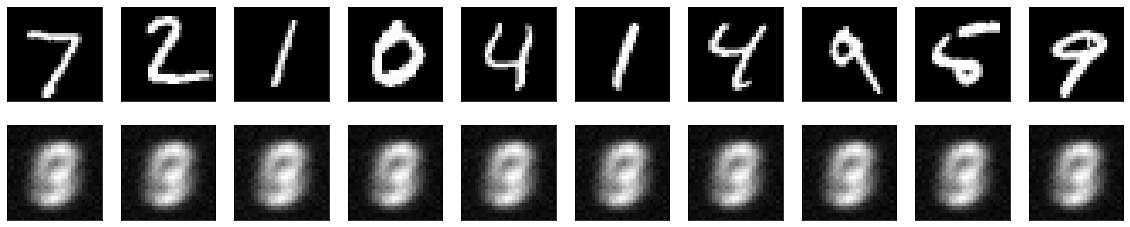

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Challenge

Expected to talk about the components of autoencoder and their purpose. 

# Train an Autoencoder (Learn)
<a id="p2"></a>

## Overview

As long as our architecture maintains an hourglass shape, we can continue to add layers and create a deeper network. 

## Follow Along

### Deep Autoencoder

In [24]:
# Model needs to be symetrical, relu works better with images, reducing to 32
input_img = Input(shape=(784,)) # 1st layer of the network
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded) # Fully dehydrated layer

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded) 
# Sigmoid used since input normalized between 0-1 for grayscale, for probabilistic representation

In [25]:
# compile & fit model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=784,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=True
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3385 - val_loss: 0.2489
Epoch 2/500
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2216 - val_loss: 0.1909
Epoch 3/500
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1749 - val_loss: 0.1586
Epoch 4/500
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1516 - val_loss: 0.1434
Epoch 5/500
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1412 - val_loss: 0.1363
Epoch 6/500
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1350 - val_loss: 0.1308
Epoch 7/500
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1296 - val_loss: 0.1256
Epoch 8/500
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1256 - val_loss: 0.1225
Epoch 9/500
60000/60000 [==============================] - 2s 31us/sample - loss: 0.12

In [27]:
decoded_imgs = autoencoder.predict(x_test)

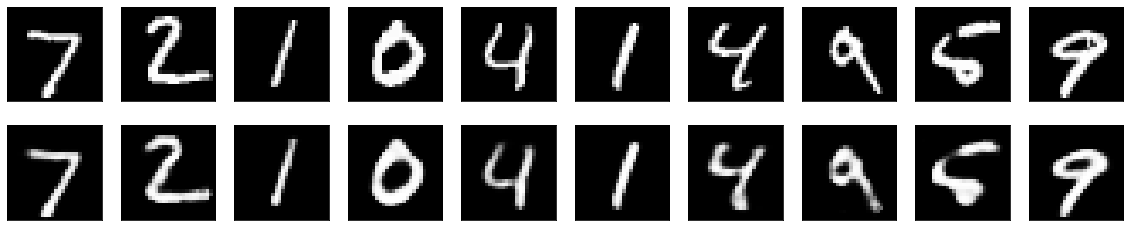

In [28]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

> Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

> Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [7]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

# Create Model - Convolutions with UpSampling
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# At this point the representation is (4, 4, 8) i.e. 128-dimensional representation

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Using TensorFlow backend.


In [8]:
# No dense layers, only convolutions
autoencoder.summary()

# 16 - 28x28 feature maps (2nd layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [9]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [10]:
#wandb.init(project="mnist_autoencoder", entity="ds5")

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=784,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=True
               )




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 27s 442us/step - loss: 0.3797 - val_loss: 0.2343
Epoch 2/100
60000/60000 [==============================] - 26s 429us/step - loss: 0.2108 - val_loss: 0.1912
Epoch 3/100
60000/60000 [==============================] - 24s 404us/step - loss: 0.1789 - val_loss: 0.1681
Epoch 4/100
60000/60000 [==============================] - 24s 405us/step - loss: 0.1621 - val_loss: 0.1551
Epoch 5/100
60000/60000 [==============================] - 24s 405us/step - loss: 0.1517 - val_loss: 0.1466
Epoch 6/100
60000/60000 [==============================] - 24s 403us/step - loss: 0.1446 - val_loss: 0.1407
Epoch 7/100
60000/60000 [==============================] - 24s 404us/step - loss: 0.1390 - val_loss: 0.1355
Epoch 8/100
60000/60000 [==============================] - 24s 403us/step - loss: 0.1343 - val_loss: 0.1312
Epoch 9/100
60000/60000 [==============================] - 24s 405us/step - lo

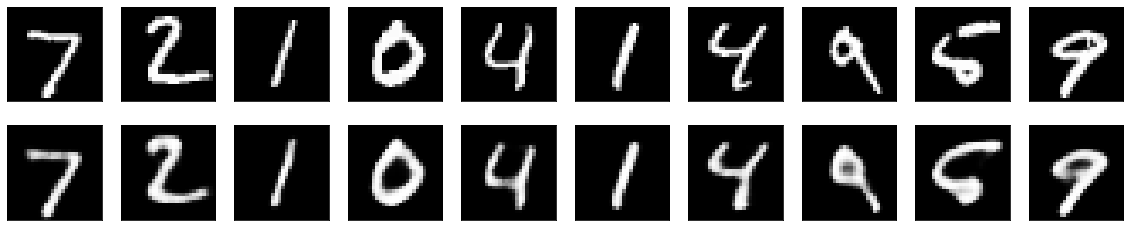

In [14]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Visualization of the Representations

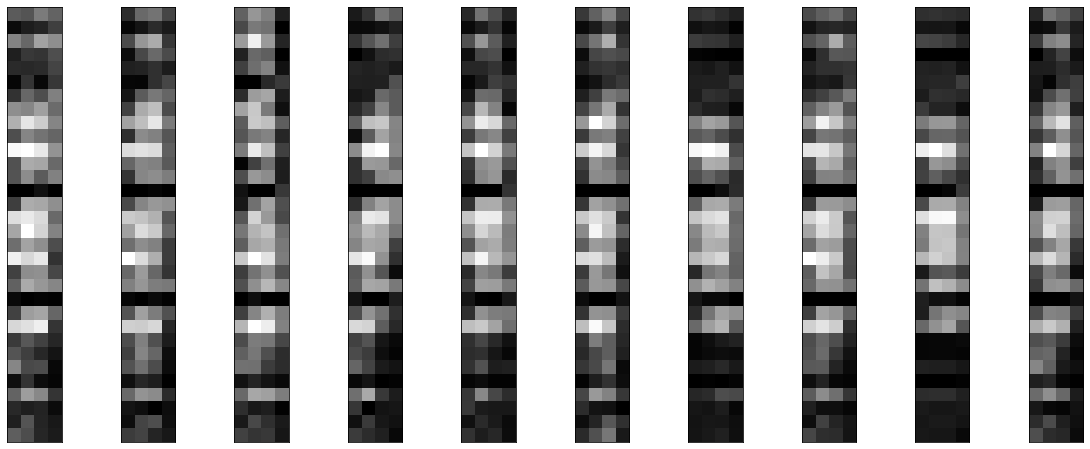

In [17]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Challenge

You will train an autoencoder at some point in the near future. 

# Information Retrieval with Autoencoders (Learn)
<a id="p3"></a>

## Overview

A common usecase for autoencoders is for reverse image search. Let's try to draw an image and see what's most similiar in our dataset. 

To accomplish this we will need to slice our autoendoer in half to extract our reduced features. :) 

## Follow Along

In [18]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)

In [19]:
encoded_imgs[0].T

array([[[3.2628517 , 3.022766  , 4.4394956 , 3.5605707 ],
        [6.3199973 , 8.271779  , 7.339562  , 4.785758  ],
        [5.9453807 , 9.145332  , 7.559821  , 4.6918335 ],
        [2.10689   , 3.1417272 , 2.3943646 , 1.3929424 ]],

       [[0.42015174, 1.063714  , 1.3269576 , 2.2807333 ],
        [2.804867  , 4.783341  , 4.1278596 , 3.651883  ],
        [3.972507  , 5.8650255 , 5.1196575 , 2.763334  ],
        [3.027194  , 2.2872138 , 1.4129894 , 0.74526805]],

       [[4.712946  , 3.7132826 , 5.834279  , 5.091455  ],
        [8.945789  , 9.167654  , 8.3400955 , 5.312877  ],
        [8.596875  , 7.7216907 , 8.306534  , 1.7962409 ],
        [4.8252316 , 2.6379082 , 2.7264411 , 0.31440237]],

       [[1.1139948 , 2.0220487 , 1.8715419 , 2.8214881 ],
        [2.9720619 , 6.1479497 , 5.964859  , 3.7720523 ],
        [2.3854675 , 5.0807004 , 5.161518  , 2.5536914 ],
        [0.53820443, 1.841689  , 0.43353266, 0.17912517]],

       [[1.5250566 , 1.5028799 , 1.5735421 , 2.444766  ],
      

In [20]:
encoded_imgs[0].reshape((128,))

array([3.2628517 , 0.42015174, 4.712946  , 1.1139948 , 1.5250566 ,
       0.22352387, 1.8045815 , 5.1206837 , 6.3199973 , 2.804867  ,
       8.945789  , 2.9720619 , 2.991782  , 0.        , 2.2468035 ,
       7.9662433 , 5.9453807 , 3.972507  , 8.596875  , 2.3854675 ,
       3.4983332 , 0.35647368, 2.384544  , 7.7175636 , 2.10689   ,
       3.027194  , 4.8252316 , 0.53820443, 3.564173  , 1.4823307 ,
       1.1158755 , 3.3824842 , 3.022766  , 1.063714  , 3.7132826 ,
       2.0220487 , 1.5028799 , 1.885794  , 3.6970696 , 4.8306136 ,
       8.271779  , 4.783341  , 9.167654  , 6.1479497 , 5.0317063 ,
       0.        , 6.164651  , 8.377255  , 9.145332  , 5.8650255 ,
       7.7216907 , 5.0807004 , 6.1189733 , 0.        , 5.6424174 ,
       8.056158  , 3.1417272 , 2.2872138 , 2.6379082 , 1.841689  ,
       5.6489334 , 1.1004685 , 3.0284257 , 2.7706175 , 4.4394956 ,
       1.3269576 , 5.834279  , 1.8715419 , 1.5735421 , 0.31643707,
       2.8187895 , 5.765021  , 7.339562  , 4.1278596 , 8.34009

In [22]:
#from sklearn.neighbors import NearestNeighbors

#nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
#nn.fit(encoded_imgs)

In [23]:
#nn.kneighbors(...)

## Challenge

You should already be familiar with KNN and similarity queries, so the key component of this section is know what to 'slice' from your autoencoder (the encoder) to extract features from your data. 

# Review

* <a href="#p1">Part 1</a>: Describe the componenets of an autoencoder
    - Enocder
    - Decoder
* <a href="#p2">Part 2</a>: Train an autoencoder
    - Can do in Keras Easily
    - Can use a variety of architectures
    - Architectures must follow hourglass shape
* <a href="#p3">Part 3</a>: Apply an autoenocder to a basic information retrieval problem
    - Extract just the encoder to use for various tasks
    - AE ares good for dimensionality reduction, reverse image search, and may more things. 


# Sources

__References__
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Deep Learning Cookbook](http://shop.oreilly.com/product/0636920097471.do)

__Additional Material__